In [157]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [158]:
dataset = pd.read_csv('/Users/ala.dharmateja/Desktop/InsuranceCostPrediction/Train_Data.csv')
print(dataset.head())

         age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900


In [159]:
print(dataset.shape)

(3630, 7)


In [160]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [161]:
dataset.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/xc/whnmd2_955g534yy1vq5l_9w0000gn/T/ipykernel_2664/39136220.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['age'])


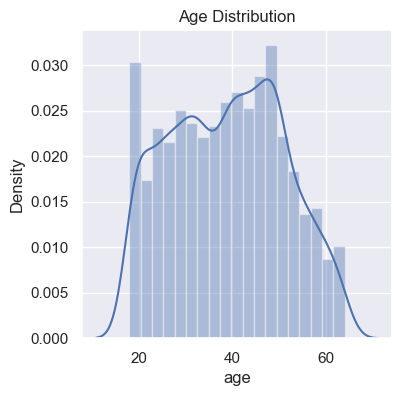

In [162]:
import seaborn as sns
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

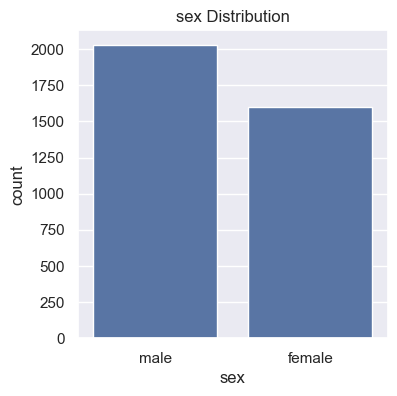

In [163]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data= dataset)
plt.title('sex Distribution')
plt.show()

/var/folders/xc/whnmd2_955g534yy1vq5l_9w0000gn/T/ipykernel_2664/2519670190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['bmi'])


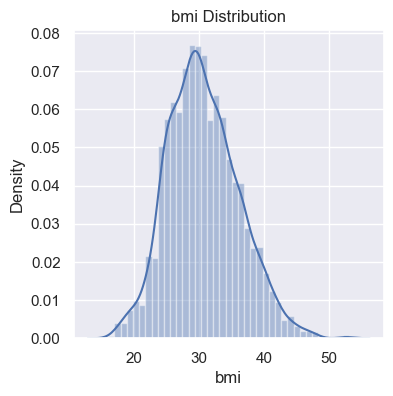

In [164]:
plt.figure(figsize=(4,4))
sns.distplot(dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

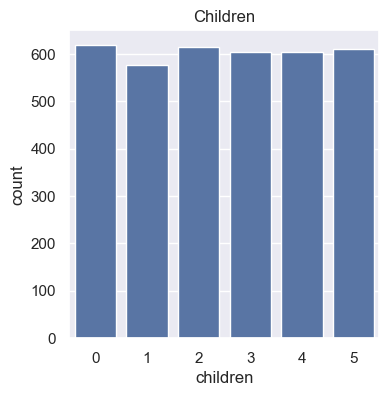

In [165]:
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=dataset)
plt.title('Children')
plt.show()

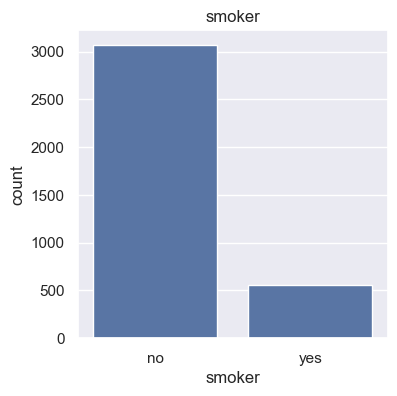

In [166]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=dataset)
plt.title('smoker')
plt.show()

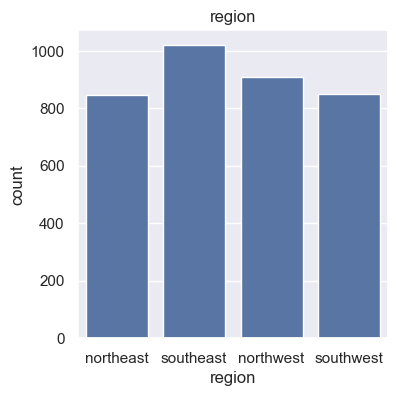

In [167]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=dataset)
plt.title('region')
plt.show()

/var/folders/xc/whnmd2_955g534yy1vq5l_9w0000gn/T/ipykernel_2664/3765092780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['charges'])


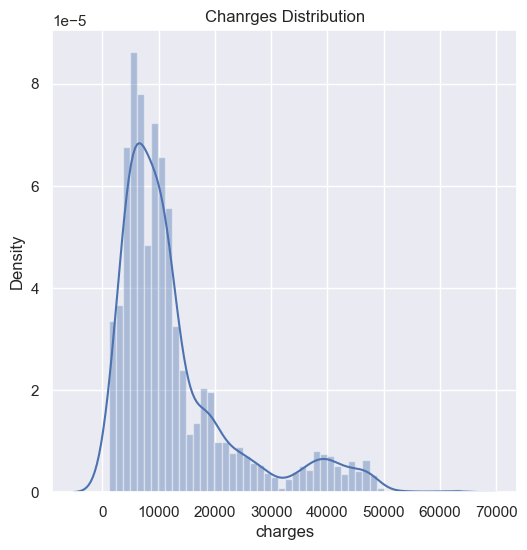

In [168]:
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('Chanrges Distribution')
plt.show()

In [169]:
print(dataset[:5])

         age     sex        bmi smoker     region  children       charges
0  21.000000    male  25.745000     no  northeast         2   3279.868550
1  36.976978  female  25.744165    yes  southeast         3  21454.494239
2  18.000000    male  30.030000     no  southeast         1   1720.353700
3  37.000000    male  30.676891     no  northeast         3   6801.437542
4  58.000000    male  32.010000     no  southeast         1  11946.625900


In [170]:
categorical_features = ['sex', 'smoker', 'region']  # Adjust based on your dataset's actual column names
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features),
        ('scaling', StandardScaler(), ['age', 'bmi', 'children'])  # Assuming these are the numerical columns
    ], remainder='passthrough'
)

In [171]:
X = dataset.drop(columns=['charges'])  # Assuming 'charges' is the target variable
y = dataset['charges']

# Fit and transform the entire dataset
X_transformed = ct.fit_transform(X)

In [172]:
print(X[0:5])

         age     sex        bmi smoker     region  children
0  21.000000    male  25.745000     no  northeast         2
1  36.976978  female  25.744165    yes  southeast         3
2  18.000000    male  30.030000     no  southeast         1
3  37.000000    male  30.676891     no  northeast         3
4  58.000000    male  32.010000     no  southeast         1


In [173]:
print(y[0:5])

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=1)


In [227]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return rmse, mae, r2

# Random Forest
rf_model = RandomForestRegressor(max_depth=10, n_estimators=50,random_state=42)
rf_model.fit(X_train, y_train)
rf_rmse, rf_mae, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print(f"Random Forest - MSE: {rf_rmse:.2f}, MAE: {rf_mae:.2f}, R2: {rf_r2}")

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_rmse, gb_mae, gb_r2 = evaluate_model(gb_model, X_test, y_test)
print(f"Gradient Boosting - MSE: {gb_rmse:.2f}, MAE: {gb_mae:.2f}, R2: {gb_r2}")

Random Forest - MSE: 3707.19, MAE: 1570.64, R2: 0.8840129927096689
Gradient Boosting - MSE: 4058.92, MAE: 2080.62, R2: 0.860959822393757


In [228]:
# Define base models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

base_models = [
    ('random_forest', RandomForestRegressor(max_depth=25, n_estimators=100)),
    ('gradient_boosting', GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100, random_state=42))
]


# Define stacking regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()
)

# Train the model
stacking_regressor.fit(X_train, y_train)

# Save the stacking regressor model
with open('stacking_regressor.pkl', 'wb') as f:
    pickle.dump(stacking_regressor, f)

# Save the column transformer
with open('column_transformer.pkl', 'wb') as f:
    pickle.dump(ct, f)

print("Model and column transformer saved successfully.")

Model and column transformer saved successfully.


In [212]:
y_pt = stacking_regressor.predict(X_test)
r2_stacked = r2_score(y_test, y_pt)
mae = mean_absolute_error(y_test, y_pt)

rmse = root_mean_squared_error(y_test, y_pt)
print(f'R² score: {r2_stacked}')
print("RMSE",rmse)
print(f'MAE: {mae}')

R² score: 0.8912241021852476
RMSE 3590.1006650376166
MAE: 1473.8455713342964


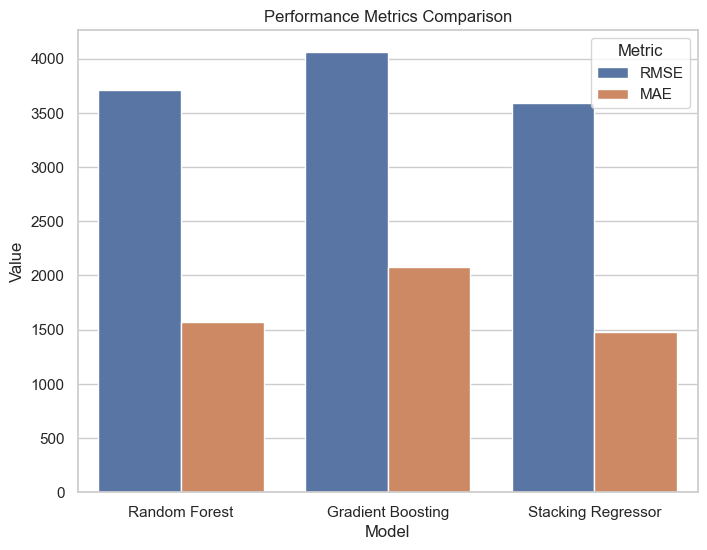

In [238]:
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Stacking Regressor'],
    'RMSE': [rf_rmse, gb_rmse, rmse],
    'MAE': [rf_mae, gb_mae, mae],
}
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend(title='Metric')

# Show plot
plt.show()

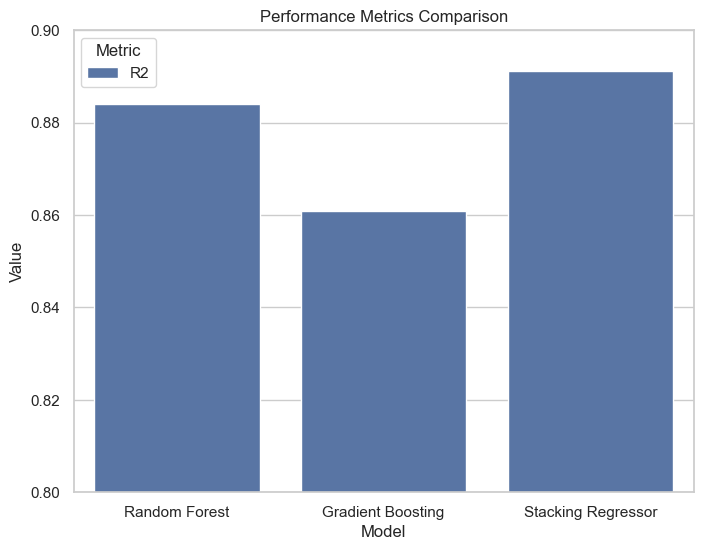

In [244]:
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Stacking Regressor'],
    'R2': [rf_r2, gb_r2, r2_stacked]
}
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted)

# Add title and labels
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Value')
plt.legend(title='Metric')
plt.ylim(0.8, 0.9) 
# Show plot
plt.show()